In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv("flipkart_mobile5g.csv")
df

,Title,Price,Category,Rating,Number of Reviews
0,Unknown,0,mobiles 5g,Unknown,0
1,Unknown,0,mobiles 5g,Unknown,0
2,OPPO K13x 5G 6000mAh and 45W SUPERVOOC Charger...,"₹11,999",mobiles 5g,4.5,"13,953 Ratings & 1,243 Reviews"
3,"Nothing Phone (3) (Black, 256 GB)","₹79,999",mobiles 5g,4.4,"1,735 Ratings & 158 Reviews"
4,"vivo T4x 5G (Pronto Purple, 128 GB)","₹14,499",mobiles 5g,4.4,"1,18,524 Ratings & 5,772 Reviews"
...,...,...,...,...,...
663,"Tecno Pop 9 5G (Aurora Cloud, 64 GB)","₹8,699",mobiles 5g,4.1,127 Ratings & 7 Reviews
664,"MOTOROLA Edge 60 Pro (Pantone Walnut, 256 GB)","₹29,999",mobiles 5g,4.3,"10,271 Ratings & 889 Reviews"
665,Unknown,0,mobiles 5g,Unknown,0
666,Unknown,0,mobiles 5g,4.4,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              668 non-null    object
 1   Price              668 non-null    object
 2   Category           668 non-null    object
 3   Rating             668 non-null    object
 4   Number of Reviews  668 non-null    object
dtypes: object(5)
memory usage: 26.2+ KB


In [ ]:
df_cleaned = df[(df['Title'] != 'Unknown') & (df['Price'] != '0') & (df['Rating'] != 'Unknown')]

# Reset index after filtering
df_cleaned = df_cleaned.reset_index(drop=True)

print(df_cleaned.shape)
df_cleaned.head()

(552, 5)


,Title,Price,Category,Rating,Number of Reviews
0,OPPO K13x 5G 6000mAh and 45W SUPERVOOC Charger...,"₹11,999",mobiles 5g,4.5,"13,953 Ratings & 1,243 Reviews"
1,"Nothing Phone (3) (Black, 256 GB)","₹79,999",mobiles 5g,4.4,"1,735 Ratings & 158 Reviews"
2,"vivo T4x 5G (Pronto Purple, 128 GB)","₹14,499",mobiles 5g,4.4,"1,18,524 Ratings & 5,772 Reviews"
3,"vivo T4x 5G (Glacial Teal, 128 GB)","₹13,499",mobiles 5g,4.4,"1,57,603 Ratings & 7,149 Reviews"
4,"vivo T4 5G (Phantom Grey, 128 GB)","₹20,999",mobiles 5g,4.5,"70,882 Ratings & 3,232 Reviews"


In [ ]:
df_cleaned['Price'] = df_cleaned['Price'].str.replace('₹', '', regex=False)
df_cleaned['Price'] = df_cleaned['Price'].str.replace(',', '', regex=False)
df_cleaned['Price'] = df_cleaned['Price'].astype(float)

In [ ]:
df["Price"] = df["Price"].str.replace("₹", "").str.replace(",", "").astype(float)

In [ ]:
import re

def extract_reviews(text):
    if isinstance(text, str):
        # Look for the part ending with 'Reviews'
        match = re.search(r'(\d[\d,]*)\s*Reviews', text)
        if match:
            return int(match.group(1).replace(',', ''))
    return None

df_cleaned['Number_of_Reviews'] = df_cleaned['Number of Reviews'].apply(extract_reviews)

In [ ]:
df_cleaned.head()

,Title,Price,Category,Rating,Number of Reviews,Number_of_Reviews
0,OPPO K13x 5G 6000mAh and 45W SUPERVOOC Charger...,11999.0,mobiles 5g,4.5,"13,953 Ratings & 1,243 Reviews",1243
1,"Nothing Phone (3) (Black, 256 GB)",79999.0,mobiles 5g,4.4,"1,735 Ratings & 158 Reviews",158
2,"vivo T4x 5G (Pronto Purple, 128 GB)",14499.0,mobiles 5g,4.4,"1,18,524 Ratings & 5,772 Reviews",5772
3,"vivo T4x 5G (Glacial Teal, 128 GB)",13499.0,mobiles 5g,4.4,"1,57,603 Ratings & 7,149 Reviews",7149
4,"vivo T4 5G (Phantom Grey, 128 GB)",20999.0,mobiles 5g,4.5,"70,882 Ratings & 3,232 Reviews",3232


In [ ]:
df_cleaned.drop(columns=['Number of Reviews'], inplace=True)

In [ ]:
df_cleaned.head()

,Title,Price,Category,Rating,Number_of_Reviews
0,OPPO K13x 5G 6000mAh and 45W SUPERVOOC Charger...,11999.0,mobiles 5g,4.5,1243
1,"Nothing Phone (3) (Black, 256 GB)",79999.0,mobiles 5g,4.4,158
2,"vivo T4x 5G (Pronto Purple, 128 GB)",14499.0,mobiles 5g,4.4,5772
3,"vivo T4x 5G (Glacial Teal, 128 GB)",13499.0,mobiles 5g,4.4,7149
4,"vivo T4 5G (Phantom Grey, 128 GB)",20999.0,mobiles 5g,4.5,3232


In [ ]:
df_cleaned.tail()

,Title,Price,Category,Rating,Number_of_Reviews
547,"Ai+ Nova 5G (Sparkle Red, 128 GB)",7999.0,mobiles 5g,4.1,782
548,"MOTOROLA Edge 60 Pro (Pantone Shadow, 256 GB)",29999.0,mobiles 5g,4.3,889
549,"Apple iPhone 14 (Midnight, 128 GB)",52900.0,mobiles 5g,4.6,11822
550,"Tecno Pop 9 5G (Aurora Cloud, 64 GB)",8699.0,mobiles 5g,4.1,7
551,"MOTOROLA Edge 60 Pro (Pantone Walnut, 256 GB)",29999.0,mobiles 5g,4.3,889


In [ ]:
df.isnull().sum()

,0
Title,0
Price,0
Category,0
Rating,0
Number of Reviews,0


In [ ]:
print(df.columns.tolist())


['Title', 'Price', 'Category', 'Rating', 'Number of Reviews']


In [ ]:
# Remove symbols and convert to numeric
df_cleaned['Price'] = df_cleaned['Price'].replace('[₹,]', '', regex=True).astype(float)
df_cleaned['Rating'] = pd.to_numeric(df_cleaned['Rating'], errors='coerce')
df_cleaned['Number_of_Reviews'] = pd.to_numeric(df_cleaned['Number_of_Reviews'], errors='coerce')

# Drop any rows that couldn't convert
df_cleaned = df_cleaned.dropna(subset=['Price', 'Rating', 'Number_of_Reviews'])


In [ ]:
!pip install sqlalchemy pymysql


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 1.2 MB/s eta 0:00:00


In [ ]:
from sqlalchemy import create_engine
import pandas as pd


In [ ]:
user = 'root'
password = 'Christi@2001'
host = 'localhost'
port = 3306
database = 'flipkart'

# Create SQLAlchemy engine (connector)
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")


In [ ]:
df_cleaned.to_sql('cleaned_data', con=engine, if_exists='replace', index=False)
print("✅ Cleaned data successfully pushed to MySQL!")


OperationalError: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on '2001@localhost' ([Errno -2] Name or service not known)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [ ]:
# df_cleaned is your cleaned dataframe
df_cleaned.to_sql('cleaned_data', con=engine, if_exists='replace', index=False)

print("✅ Cleaned data successfully pushed to MySQL!")


OperationalError: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on '2001@localhost' ([Errno -2] Name or service not known)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)

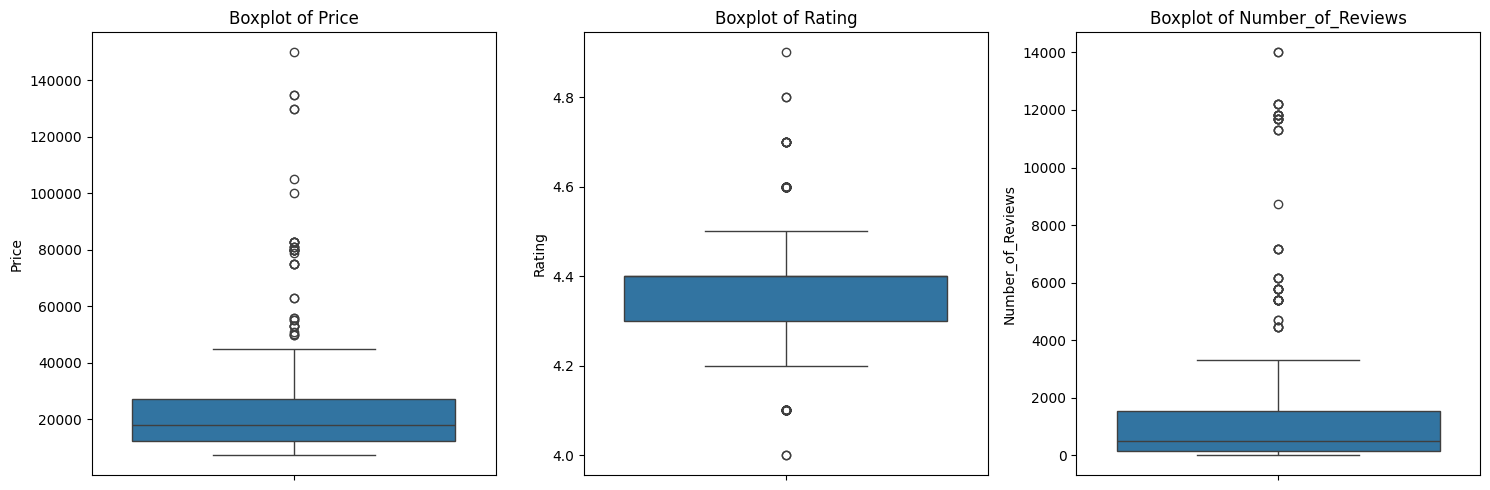

In [ ]:
numeric_cols = ['Price', 'Rating', 'Number_of_Reviews']

# Smaller figure, all plots side by side
plt.figure(figsize=(15, 5))  # width=15, height=5

for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)  # 1 row, n_cols columns
    sns.boxplot(y=df_cleaned[col])
    plt.title(f"Boxplot of {col}", fontsize=12)
    plt.ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
numeric_cols = ['Price', 'Rating', 'Number_of_Reviews']

# Remove outliers using IQR
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Apply outlier removal for each numeric column
for col in numeric_cols:
    df_cleaned = remove_outliers(df_cleaned, col)

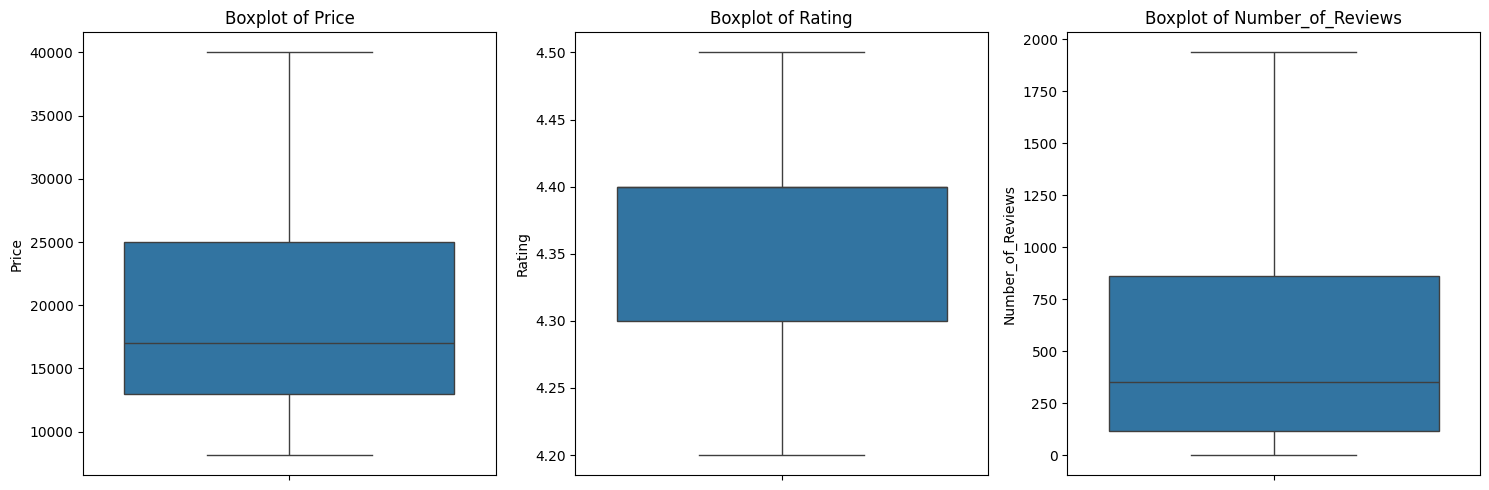

In [ ]:
numeric_cols = ['Price', 'Rating', 'Number_of_Reviews']

# Smaller figure, all plots side by side
plt.figure(figsize=(15, 5))  # width=15, height=5

for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)  # 1 row, n_cols columns
    sns.boxplot(y=df_cleaned[col])
    plt.title(f"Boxplot of {col}", fontsize=12)
    plt.ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
df_cleaned.describe()

,Price,Rating,Number_of_Reviews
count,376.000000,376.000000,376.000000
mean,19385.571809,4.346011,539.430851
std,7825.977532,0.098712,528.450440
min,8150.000000,4.200000,2.000000
25%,12999.000000,4.300000,115.000000
50%,16999.000000,4.400000,351.000000
75%,24999.000000,4.400000,862.000000
max,39999.000000,4.500000,1936.000000


In [ ]:
import scipy.stats as stats
import numpy as np

# Create groups
expensive = df_cleaned[df_cleaned['Price'] > 20000]['Rating'].dropna()
cheap = df_cleaned[df_cleaned['Price'] <= 20000]['Rating'].dropna()

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(expensive, cheap, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print(" Significant difference in average ratings between expensive and cheap phones.")
else:
    print(" No significant difference in average ratings between expensive and cheap phones.")


T-statistic: 10.723
P-value: 0.0000
 Significant difference in average ratings between expensive and cheap phones.


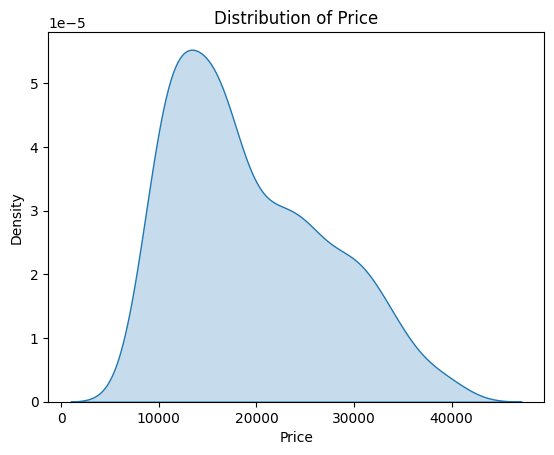

In [ ]:
sns.kdeplot(data=df_cleaned['Price'],shade=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

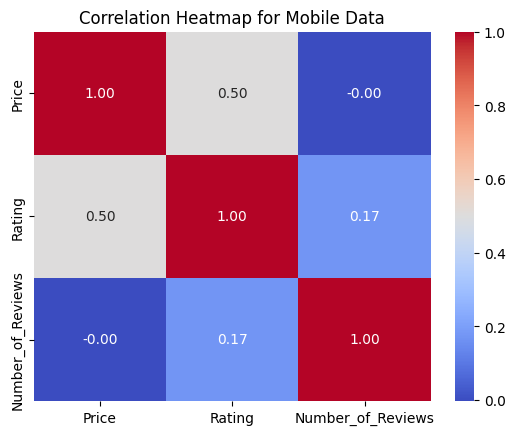

In [ ]:
numeric_df = df_cleaned.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Mobile Data')
plt.show()

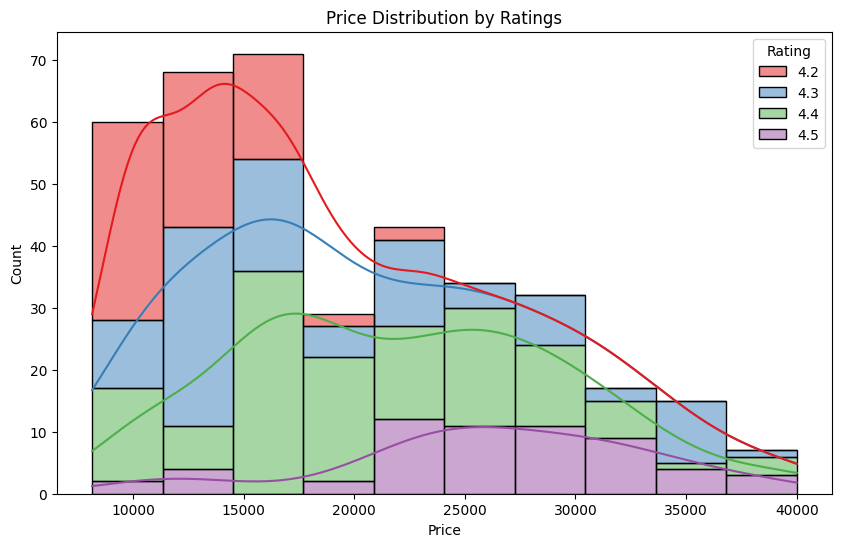

In [ ]:
plt.figure(figsize=(10,6))

# Create histogram with KDE
sns.histplot(data=df_cleaned, x='Price', hue='Rating',multiple='stack', kde=True, palette='Set1', edgecolor='black')

plt.title('Price Distribution by Ratings')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [ ]:
X = df_cleaned[['Price', 'Rating', 'Number_of_Reviews']]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.cluster import KMeans

# Choose number of clusters
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Cluster labels
labels = kmeans.labels_
df_cleaned['cluster'] = labels

print(df_cleaned)


                                                 Title    Price    Category  \
0    OPPO K13x 5G 6000mAh and 45W SUPERVOOC Charger...  11999.0  mobiles 5g   
11               realme P4 Pro 5G (Birch Wood, 128 GB)  22999.0  mobiles 5g   
15               realme P3x 5G (Midnight Blue, 128 GB)  11249.0  mobiles 5g   
32                realme P3x 5G (Stellar Pink, 128 GB)  10249.0  mobiles 5g   
33   vivo T4 Lite 5G Charger in the Box (Prism Blue...   9999.0  mobiles 5g   
..                                                 ...      ...         ...   
544  MOTOROLA Edge 60 Pro (Pantone Dazzling Blue, 2...  29999.0  mobiles 5g   
545              OPPO F27 Pro+ (Midnight Navy, 256 GB)  21500.0  mobiles 5g   
546             realme 14 Pro+ 5G (Suede Grey, 256 GB)  28999.0  mobiles 5g   
548      MOTOROLA Edge 60 Pro (Pantone Shadow, 256 GB)  29999.0  mobiles 5g   
551      MOTOROLA Edge 60 Pro (Pantone Walnut, 256 GB)  29999.0  mobiles 5g   

     Rating  Number_of_Reviews  cluster  
0       4

In [ ]:
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=0)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X)

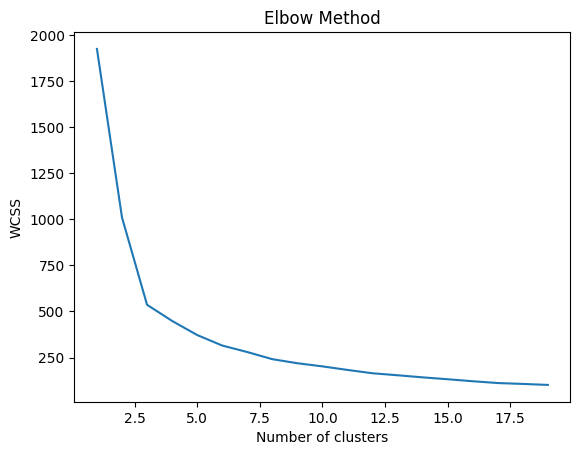

In [ ]:
wcss = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, kmeans.labels_)

print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.34073991973453566


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [ ]:
pred_y = kmeans.fit_predict(X)

In [ ]:
pred_y

array([1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 1,
       2, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 1, 2, 0, 2, 1, 2,
       2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 0, 2, 0,
       1, 2, 1, 2, 0, 1, 0, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 1, 1, 1, 2, 0,
       1, 1, 0, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 2,
       1, 0, 1, 1, 0, 0, 1, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0,
       2, 0, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2,
       0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 2, 1, 1, 0, 0, 2, 1, 1, 2, 2, 2,
       1, 2, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 2,
       1, 0, 2, 2, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 1, 2, 0,
       0, 0, 0, 2, 1, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2,
       0, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 2, 1, 1], d

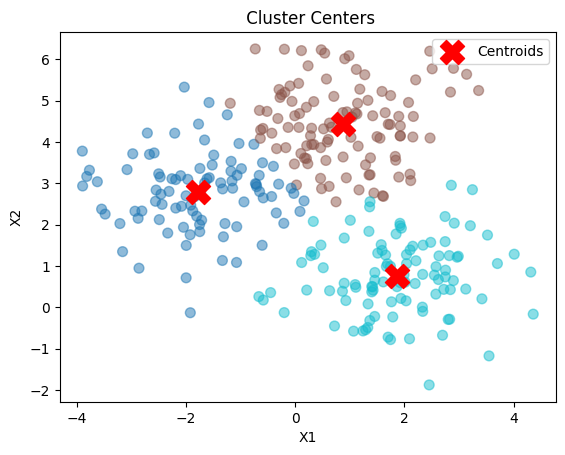

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='tab10', s=50, alpha=0.5)

# Plot cluster centers
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c='red',
    marker='X',
    label='Centroids'
)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title(' Cluster Centers')
plt.legend()
plt.show()

In [ ]:
print(df_cleaned.columns)


Index(['Title', 'Price', 'Category', 'Rating', 'Number_of_Reviews', 'cluster'], dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [ ]:
x = df_cleaned[['Price', 'Rating', 'Number_of_Reviews']]
y = df_cleaned['cluster']

# Scale features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_Predict=model.predict(x_test)

In [ ]:
Acc_logistic = accuracy_score(y_test, y_Predict)
print("Acc_logistic:", Acc_logistic)

Acc_logistic: 0.8026315789473685


In [ ]:
confusion_matrix(y_test,y_Predict)

array([[ 4,  0, 11],
       [ 0, 24,  0],
       [ 1,  3, 33]])

In [ ]:
print(classification_report(y_test,y_Predict))

              precision    recall  f1-score   support

           0       0.80      0.27      0.40        15
           1       0.89      1.00      0.94        24
           2       0.75      0.89      0.81        37

    accuracy                           0.80        76
   macro avg       0.81      0.72      0.72        76
weighted avg       0.80      0.80      0.77        76



In [ ]:
from sklearn.svm import SVC, SVR

In [ ]:
model = SVC(kernel='linear', random_state=0)
model.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_Predict=model.predict(x_test)

In [ ]:
Acc_SVC = accuracy_score(y_test, y_Predict)
print("Acc_SVC:", Acc_SVC)

Acc_SVC: 0.75


In [ ]:
confusion_matrix(y_test,y_Predict)

array([[ 4,  1, 10],
       [ 0, 24,  0],
       [ 6,  2, 29]])

In [ ]:
print(classification_report(y_test,y_Predict))

              precision    recall  f1-score   support

           0       0.40      0.27      0.32        15
           1       0.89      1.00      0.94        24
           2       0.74      0.78      0.76        37

    accuracy                           0.75        76
   macro avg       0.68      0.68      0.67        76
weighted avg       0.72      0.75      0.73        76



In [ ]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_Predict=model.predict(x_test)

In [ ]:
Acc_KNN = accuracy_score(y_test, y_Predict)
print("Acc_KNN:", Acc_KNN)

Acc_KNN: 0.8421052631578947


In [ ]:
print(classification_report(y_test,y_Predict))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69        15
           1       0.88      0.96      0.92        24
           2       0.91      0.81      0.86        37

    accuracy                           0.84        76
   macro avg       0.81      0.83      0.82        76
weighted avg       0.85      0.84      0.84        76



In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_Predict=model.predict(x_test)

In [ ]:
Acc_RF = accuracy_score(y_test, y_Predict)
print("Acc_RF:", Acc_RF)

Acc_RF: 0.9868421052631579


In [ ]:
print(classification_report(y_test,y_Predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.96      1.00      0.98        24
           2       1.00      0.97      0.99        37

    accuracy                           0.99        76
   macro avg       0.99      0.99      0.99        76
weighted avg       0.99      0.99      0.99        76



In [ ]:
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_Predict=model.predict(x_test)

In [ ]:
Acc_XG = accuracy_score(y_test, y_Predict)
print("XG:", Acc_XG)

XG: 0.9736842105263158


In [ ]:
print(classification_report(y_test,y_Predict))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.92      1.00      0.96        24
           2       1.00      0.97      0.99        37

    accuracy                           0.97        76
   macro avg       0.97      0.97      0.97        76
weighted avg       0.98      0.97      0.97        76



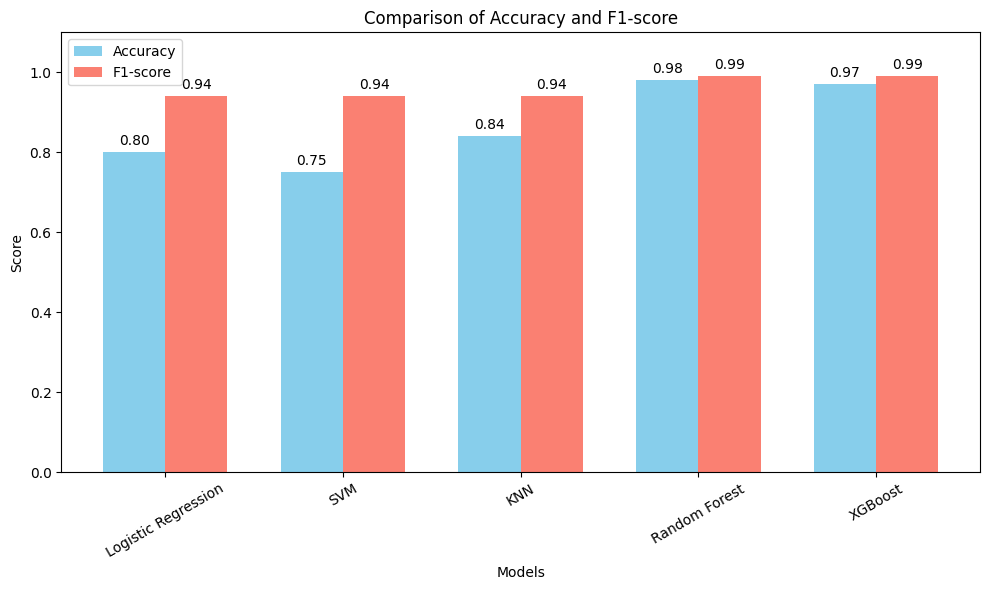

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ['Logistic Regression', 'SVM', 'KNN', 'Random Forest', 'XGBoost']

# Metrics
accuracy = [0.80, 0.75, 0.84, 0.98, 0.97]
f1_score = [0.94, 0.94, 0.94, 0.99, 0.99]

# X-axis positions
x = np.arange(len(models))
width = 0.35  # width of bars

# Create figure
fig, ax = plt.subplots(figsize=(10,6))

# Plot bars
rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy', color='skyblue')
rects2 = ax.bar(x + width/2, f1_score, width, label='F1-score', color='salmon')

# Labels and title
ax.set_ylabel('Score')
ax.set_xlabel('Models')
ax.set_title('Comparison of Accuracy and F1-score')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=30)
ax.set_ylim(0,1.1)
ax.legend()

# Show numeric values on top of bars
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0,3),
                    textcoords='offset points',
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = LogisticRegression(max_iter=500, random_state=42)

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'l1_ratio': [0, 0.5, 1]
}


In [ ]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

In [ ]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.5, 1],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='accuracy', verbose=2)

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'C': 10, 'l1_ratio': 0, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score: 0.99


In [ ]:
print("Test accuracy Logistic:", accuracy_score(y_test,y_Predict))

Test accuracy Logistic: 0.9736842105263158


In [ ]:
model = KNeighborsClassifier()

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}


In [ ]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

In [ ]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best cross-validation score: 0.9


In [ ]:
print("Test accuracy KNN:", accuracy_score(y_test, y_Predict))

Test accuracy KNN: 0.9736842105263158


In [ ]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)


In [ ]:
grid_xgb = GridSearchCV(estimator=xgb,
                        param_grid=param_grid_xgb,
                        cv=5,
                        scoring='accuracy',
                        n_jobs=-1)


In [ ]:
grid_xgb.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy')

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best cross-validation score: 0.9


In [ ]:
print("Test accuracy KNN:", accuracy_score(y_test, y_Predict))

Test accuracy KNN: 0.9736842105263158
